In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [27]:
# read in data

# source: https://www.kaggle.com/datasets/samithsachidanandan/the-global-ai-ml-data-science-salary-for-2025

df = pd.read_csv('data/salaries.csv')
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [28]:
# data cleaning
exp_level_abbr = {'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior-level', 'EX': 'Executive'}
df['experience_level'] = df['experience_level'].map(exp_level_abbr)

comp_size_abbr = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size'] = df['company_size'].map(comp_size_abbr)

emp_type_abbr = {'PT': 'Part-time', 'FT': 'Full-time', 'CT': 'Contract', 'FL': 'Freelance'}
df['employment_type'] = df['employment_type'].map(emp_type_abbr)

remote_ratio_map = {0: 'In-person', 50: 'Hybrid', 100: 'Remote'}
df['worksite'] = df['remote_ratio'].map(remote_ratio_map)
del df['remote_ratio']

df['experience_level'] = pd.Categorical(df['experience_level'], categories=['Entry-level', 'Mid-level', 'Senior-level', 'Executive'], ordered=True)
df['company_size'] = pd.Categorical(df['company_size'], categories=['Small', 'Medium', 'Large'], ordered=True)
df['worksite'] = pd.Categorical(df['worksite'], categories=['In-person', 'Hybrid', 'Remote'], ordered=True)

In [29]:
df.groupby('employee_residence').mean('salary_in_usd').sort_values('salary_in_usd', ascending=False)

,work_year,salary,salary_in_usd
employee_residence,,,
QA,2023.000000,3.000000e+05,300000.000000
VE,2024.000000,1.925000e+05,192500.000000
CZ,2023.555556,3.191014e+05,189519.777778
US,2024.043937,1.635830e+05,163597.512854
IL,2023.800000,2.573360e+05,147321.733333
...,...,...,...
TH,2022.500000,4.787500e+05,32228.500000
HU,2022.333333,6.573833e+06,27252.666667
SV,2024.600000,2.640000e+04,26400.000000


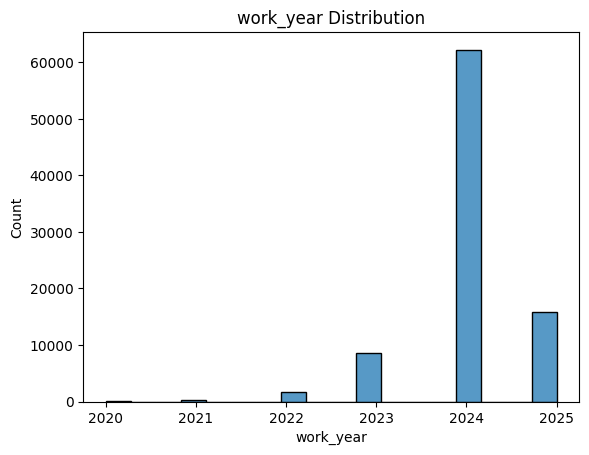

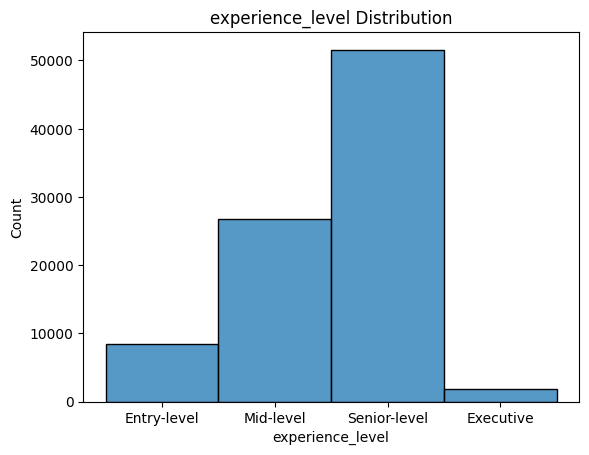

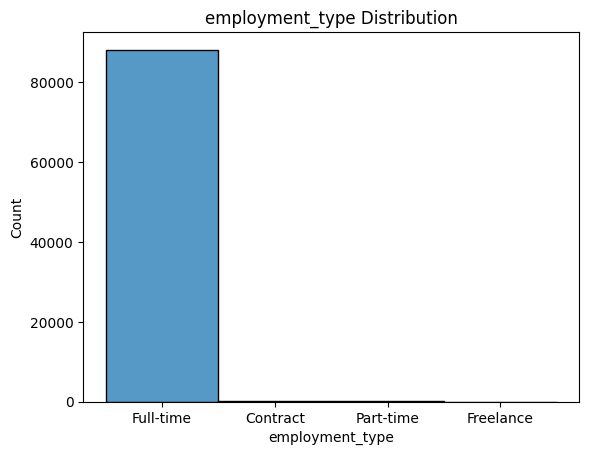

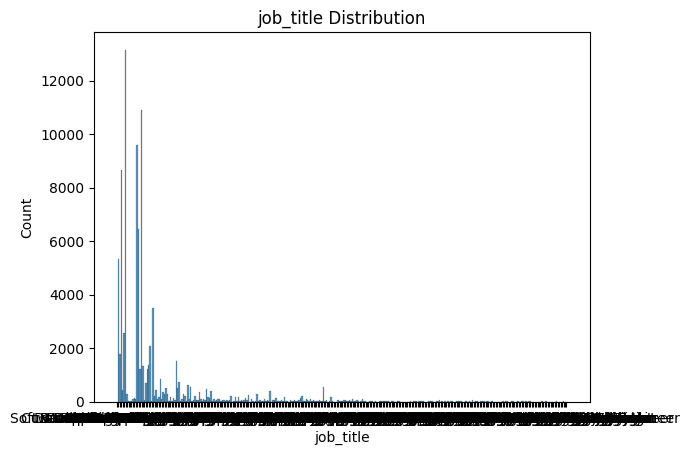

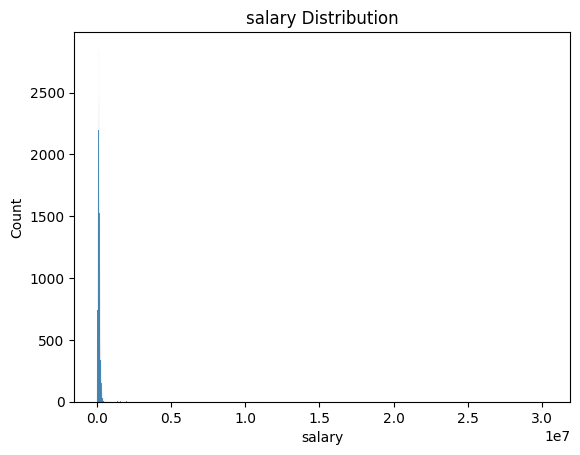

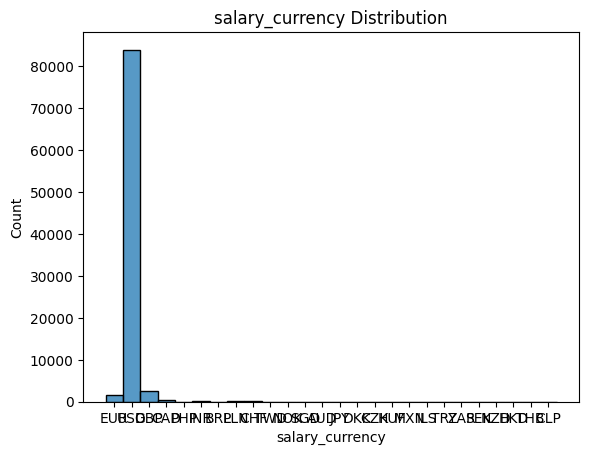

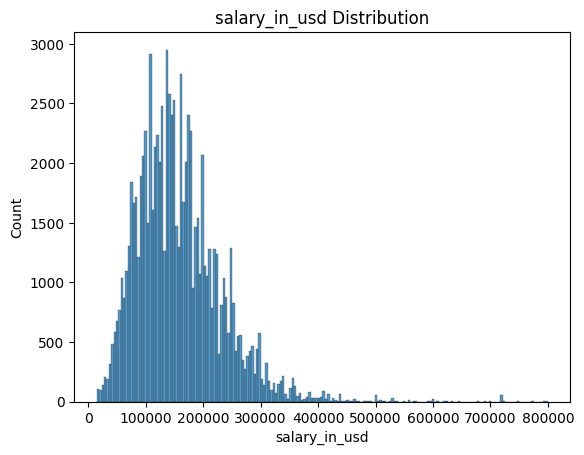

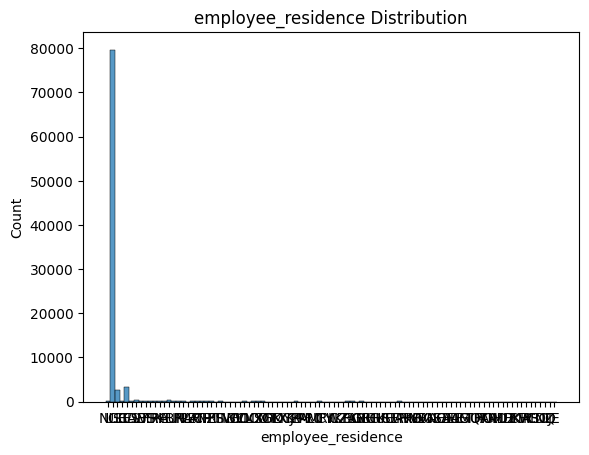

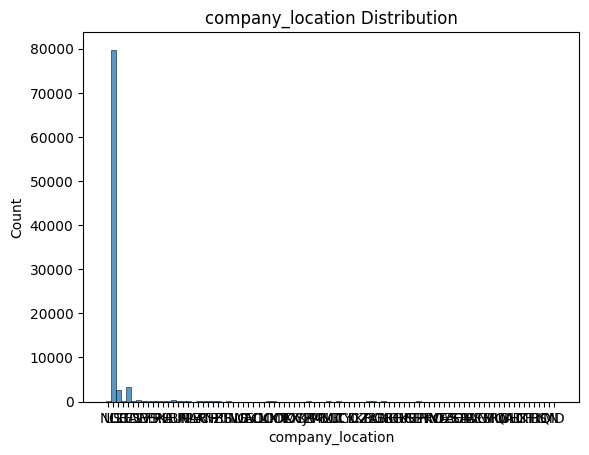

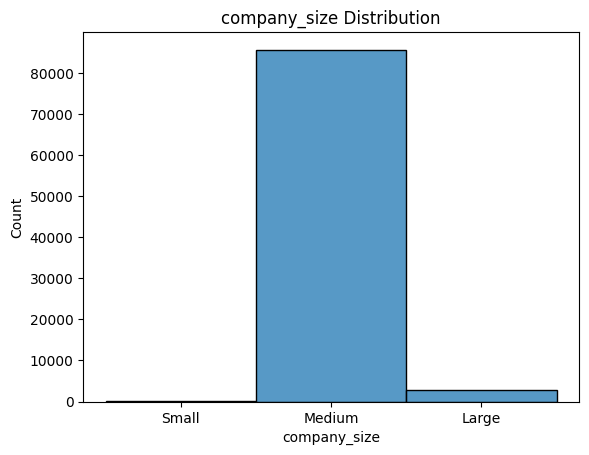

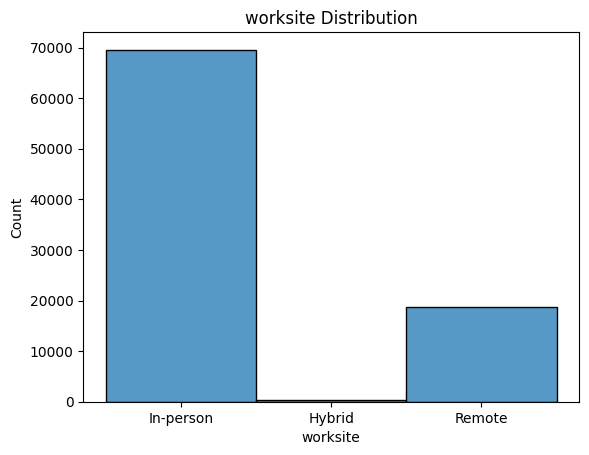

In [30]:
for col in df.columns:
    plot = sns.histplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

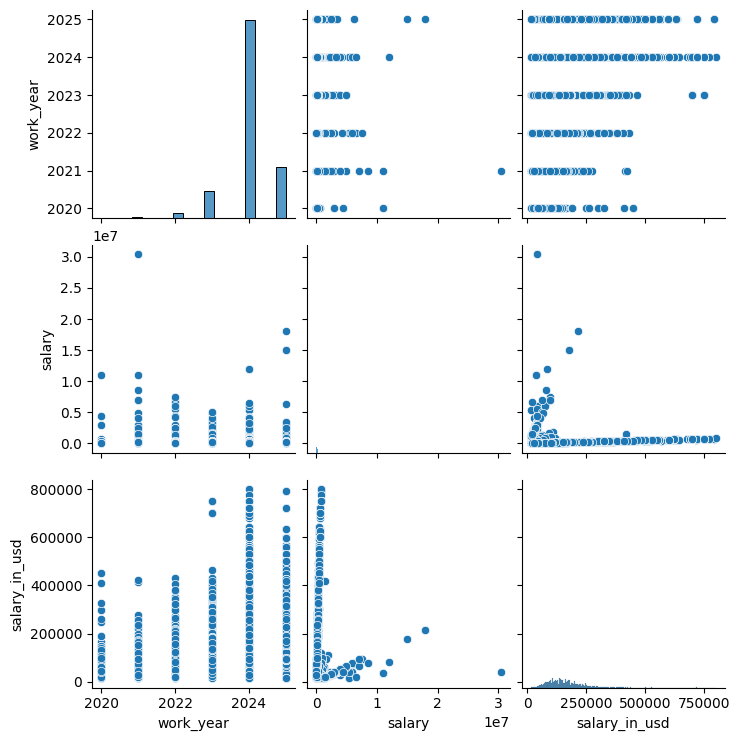

In [31]:
plot = sns.pairplot(data=df)
plt.show()

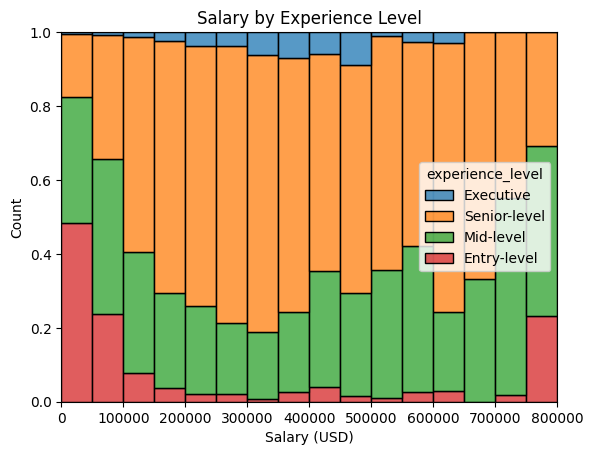

In [32]:
plot = sns.histplot(data=df, x='salary_in_usd', hue='experience_level', binrange=(0,800000), binwidth=50000, multiple='fill', hue_order=['Executive', 'Senior-level', 'Mid-level', 'Entry-level'])
plt.title('Salary by Experience Level')
plt.xlabel('Salary (USD)')
plt.show()

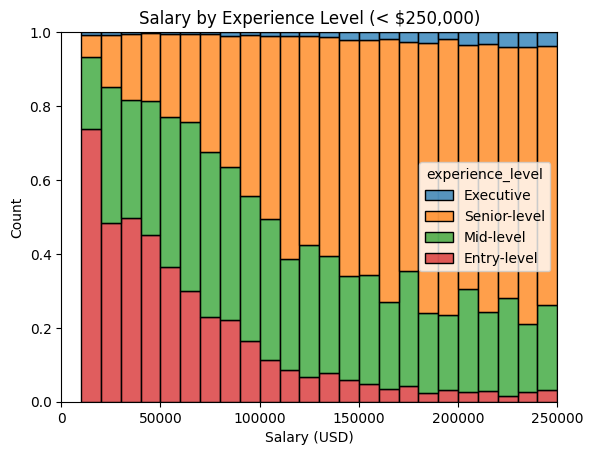

In [33]:
# zoom into < $250,000 range

plot = sns.histplot(data=df, x='salary_in_usd', hue='experience_level', binrange=(0,250000), binwidth=10000, multiple='fill', hue_order=['Executive', 'Senior-level', 'Mid-level', 'Entry-level'])
plt.title('Salary by Experience Level (< $250,000)')
plt.xlabel('Salary (USD)')
plt.show()

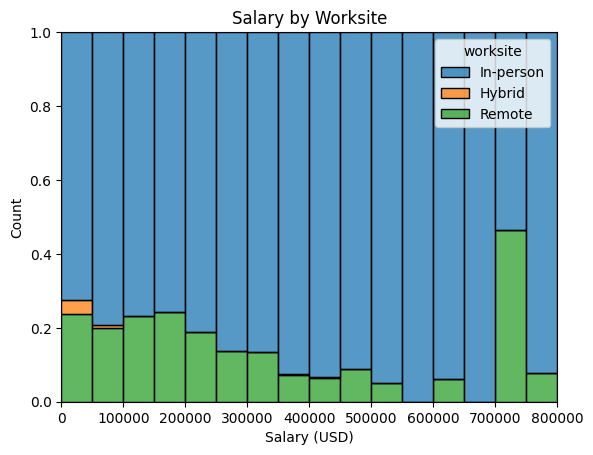

In [34]:
plot = sns.histplot(data=df, x='salary_in_usd', hue='worksite', binrange=(0,800000), binwidth=50000, multiple='fill')
plt.title('Salary by Worksite')
plt.xlabel('Salary (USD)')
plt.show()

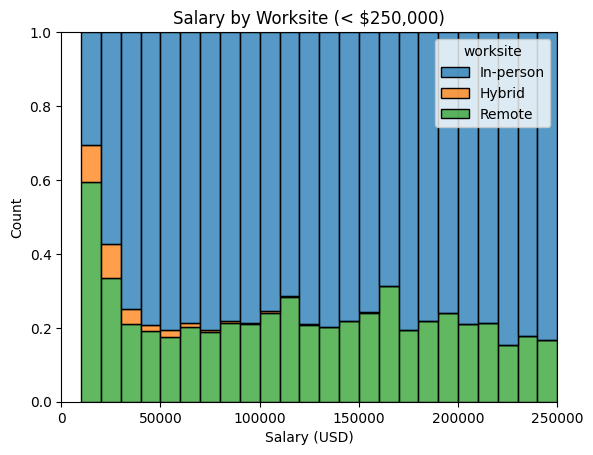

In [35]:
plot = sns.histplot(data=df, x='salary_in_usd', hue='worksite', binrange=(0,250000), binwidth=10000, multiple='fill')
plt.title('Salary by Worksite (< $250,000)')
plt.xlabel('Salary (USD)')
plt.show()

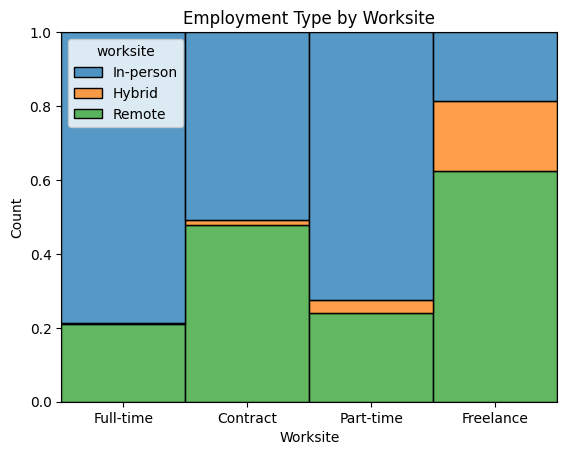

In [36]:
plot = sns.histplot(data=df, x='employment_type', hue='worksite', multiple='fill')
plt.title('Employment Type by Worksite')
plt.xlabel('Worksite')
plt.show()

In [43]:
job_title_words = dict()
for job_title in df['job_title']:
    for word in job_title.split(' '):
        job_title_words[word] = job_title_words.get(word, 0) + 1

In [ ]:
# used AI to sort and unzip the list of tuples

top_keywords_and_vals = sorted(job_title_words.items(), key=lambda x: x[1], reverse=True)[:15]
top_keywords, top_keyword_vals = zip(*top_keywords_and_vals)
top_keywords = list(top_keywords)
top_keyword_vals = list(top_keyword_vals)
top_keyword_percents = [_/len(df) for _ in top_keyword_vals]
print(top_keywords)
print(top_keyword_percents)

[('Engineer', 40034), ('Data', 38851), ('Scientist', 18195), ('Analyst', 13046), ('Software', 10543), ('Learning', 7628), ('Machine', 7617), ('Manager', 6529), ('Research', 4327), ('Architect', 2595), ('Business', 2116), ('Developer', 1896), ('Intelligence', 1873), ('Analytics', 1847), ('Product', 1841)]
['Engineer', 'Data', 'Scientist', 'Analyst', 'Software', 'Learning', 'Machine', 'Manager', 'Research', 'Architect', 'Business', 'Developer', 'Intelligence', 'Analytics', 'Product']
[400.34, 388.51, 181.95, 130.46, 105.43, 76.28, 76.17, 65.29, 43.27, 25.95, 21.16, 18.96, 18.73, 18.47, 18.41]
